# Assignment 4

Name : Aditi Zeminder

Roll No.: 32102

**AIM:-** Apply Basic PCA on the iris dataset. The data set is available at: 
https://raw.github.com/neurospin/pystatsml/master/datasets/iris.csv
1. Describe the data set. Should the dataset been standardized?
2. Describe the structure of correlations among variables.
3. Compute a PCA with the maximum number of components
4. Compute the cumulative explained variance ratio. Determine the number of 
components 𝐾 by your computed values.
5. Print the  𝐾principal components directions and correlations of the 𝐾 principal 
compo-nents with the original variables. Interpret the contribution of the original 
variables into the PC.
6. Plot the samples projected into the𝐾first PCs.
7. Color samples by their species.



---


> PCA (Principle Component Analysis) 

---

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

_Principle Component Analysis can be done in 5 steps :_

**STEP 1: STANDARDIZATION**
The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to the analysis.

**STEP 2: COVARIANCE MATRIX COMPUTATION**
The aim of this step is to understand how the variables of the input data set are varying from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix.

1. If positive then: the two variables increase or decrease together (correlated)
2. If negative then: one increases when the other decreases (Inversely correlated)

**STEP 3: COMPUTE THE EIGENVECTORS AND EIGENVALUES OF THE COVARIANCE MATRIX TO IDENTIFY THE PRINCIPAL COMPONENTS**
Perform eigenvalue decomposition on the covariance matrix to find its eigenvectors and eigenvalues. These eigenvectors represent the principal components, and the corresponding eigenvalues indicate the amount of variance explained by each principal component.

**STEP 4: SELECT PRINCIPAL COMPONENTS**
Sort the eigenvectors by their corresponding eigenvalues in descending order. Select the top k eigenvectors to retain the most important dimensions. Typically, you choose a number of principal components that retain a significant portion of the variance (e.g., 95%).

**STEP 5 : PROJECTION**
reate a new dataset by projecting the original data onto the selected principal components. This reduces the dimensionality of the data while preserving most of the relevant information.




In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df=pd.read_csv("Databases\iris.csv")
df.dtypes

a          float64
b          float64
c          float64
d          float64
species     object
dtype: object

In [7]:
#Separate features and labels
X=df.iloc[:,:-1]
species=df["species"]

1. Standardize the data

In [8]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

2.Calculate the correlation matrix

In [9]:
correlation_matrix=np.corrcoef(X_std,rowvar=False)
print("Correlation Matrix :")
print(correlation_matrix)

Correlation Matrix :
[[ 1.         -0.10936925  0.87175416  0.81795363]
 [-0.10936925  1.         -0.4205161  -0.35654409]
 [ 0.87175416 -0.4205161   1.          0.9627571 ]
 [ 0.81795363 -0.35654409  0.9627571   1.        ]]


3. Perform PCA

In [10]:
pca=PCA(n_components=4)
pca.fit(X_std)

PCA(n_components=4)

4. Calculate the cumulative explained variance ratio

In [12]:
explained_variance_ratio=pca.explained_variance_ratio_
cumulative_variance_r=np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio :")
print(explained_variance_ratio)
print("Cumulative Explained Variance Ratio :")
print(cumulative_variance_r)

Explained Variance Ratio :
[0.72770452 0.23030523 0.03683832 0.00515193]
Cumulative Explained Variance Ratio :
[0.72770452 0.95800975 0.99484807 1.        ]


5.Principal Components directions and correlation

In [13]:
print("Principal Component Directions (Loadings):")
print(pca.components_)
print("Correlations of Principal Components with Original Variables:")
print(np.corrcoef(X_std,pca.transform(X_std),rowvar=False)[:4,4:])

Principal Component Directions (Loadings):
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [ 0.37231836  0.92555649  0.02109478  0.06541577]
 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
 [-0.26199559  0.12413481  0.80115427 -0.52354627]]
Correlations of Principal Components with Original Variables:
[[ 0.89122448  0.35735211 -0.276774   -0.03761047]
 [-0.44931298  0.88835148  0.09290825  0.01782003]
 [ 0.99168442  0.02024682  0.05408378  0.11500878]
 [ 0.96499579  0.06278622  0.24329495 -0.07515708]]


6. Plot samples projected into the first two PCs

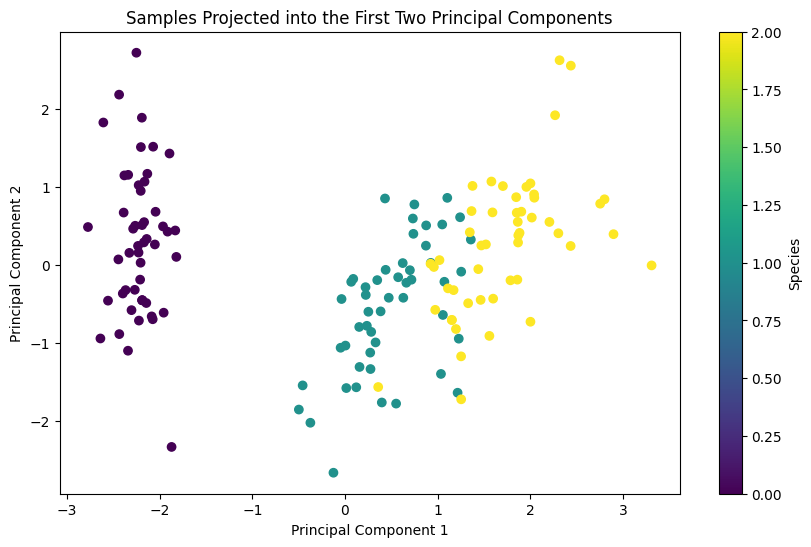

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(pca.transform(X_std)[:, 0], pca.transform(X_std)[:, 1], c=species.factorize()[0], cmap='viridis')
plt.title("Samples Projected into the First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Species')
plt.show()

## Conclusion 

In this analysis of the Iris dataset, we conducted Principal Component Analysis (PCA) to explore the underlying structure of the data and reduce its dimensionality while preserving as much information as possible. 
The iris datase consists of four features for three species of iris flowers. We standardized tge dataset by substracting the mean and diving by the standard deviation of each feature, this was to ensure all the variables have the same scale, prevent any single variable from dominating the principal components due to differences in scale. The correlation matrix revealed the relationships among the variables. We performed the PCA with maximum number of components (4) to explore the variance structur of the data. The plot demonstrates that the first two principal components provide separation between the species, particularly between setosa and other two species. 
Further analysis of this can be used to perform specific tasks such as classification and prediction. 